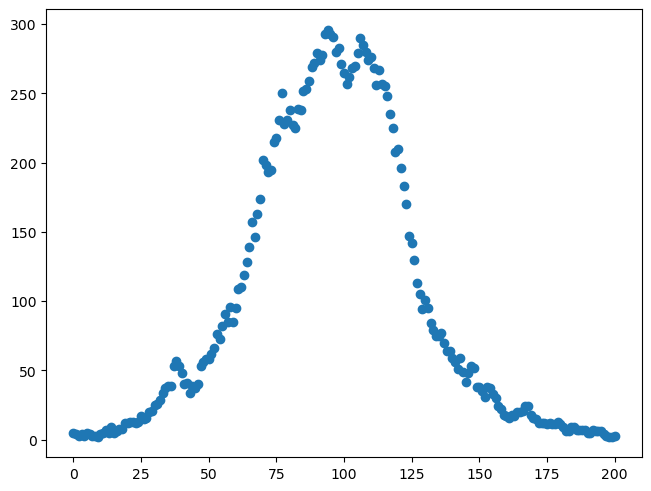

In [44]:
##########################################
# Code to generate synthetic epidemic data
# for notebook parameter fitting example
##########################################

import numpy as np
from pygom import common_models

# Initial conditions and total population
i0=5                                  # initial number of infected individuals
n_pop=1e4                             # total population size
x0 = [n_pop-i0, 0, i0, 0]             # [s0, e0, i0, r0]
# x0 = [n_pop-i0, i0, 0]             # [s0, i0, r0]

# Params
paramEval=[('beta', 0.35), ('alpha', 0.5), ('gamma', 0.25), ('N', n_pop)]
# paramEval=[('beta', 0.35), ('gamma', 0.25), ('N', n_pop)]

# Time range and increments
tmax=200                              # maximum time over which to run solver
dt=1                                  # timestep
n_timestep=int(tmax/dt)+1             # number of time points
t = np.linspace(0, tmax, n_timestep)  # times at which solution will be evaluated

initEval=(x0, t[0])

# Set up pygom object
ode = common_models.SEIR_N_stochastic(param=paramEval, init=initEval)
# ode = common_models.SIR_N_stochastic(param=paramEval, init=initEval)

# Simulate
np.random.seed(123)
sol, simT = ode.solve_stochast(t, iteration=1, full_output=True)

# Process output
sol_inf=sol[0][:,2]  # infecteds
sol_rec=sol[0][:,3]  # infecteds

# Strip down data to just points where infecteds are non zero
epi=sol_inf>0  # time points where infecteds are non zero
sol_inf=sol_inf[epi]
sol_rec=sol_rec[epi]
t=t[epi]

# save result
out = np.vstack((t, sol_inf, sol_rec))
out=np.transpose(out)
np.savetxt('seir_epi_data.txt', out, fmt='%f')


import matplotlib.pyplot as plt
f, axarr = plt.subplots(layout='constrained')
axarr.scatter(t, sol_inf)